<h1 align="center" >Machine Learning Logistic Regression Model for Natural Language Processing (NLP) - Sentimen Analysis</h1>
<hr size=10 color="green">
<h2 align="center "> Group 4 </h2> 

**The purpose of this manual is to decribe the logistic regression predictive model applied to a dataset of four department stores, in which people have provided data (positive and negative reviews) to make future predictions on the language for accurate classification**

<a href="mailto:julio.junior@business.torrens.edu.au"> 
✉ Julio Cesar Maciel Junior </a> ,
 <a href="mailto:saksham.nanda@mds.torrens.edu.au"> 
 ✉ Saksham Nanda</a>,
 <a href="mailto:patricia.montenegro@business.torrens.edu.au"> 
 ✉ Patricia Mabel Rosero</a> and 
 <a href="mailto:juan.garcia@business.torrens.edu.au">
 ✉ Juan Sebastian Ortiz Garcia</a><br>

# Table of Contents

*  <a href="#c1">1. Loading Libraries</a><br>
*  <a href="#c2">2. Exploratory Data Analysis</a><br>
*  <a href="#c3">3. Data Pre-Processing</a><br>
*  <a href="#c4">4. Data Modeling</a><br>
*  <a href="#c5">5. Model Testing with New Entry Data</a><br>




<p> <a name=  "c1"><a></a> </p>


#1. Loading Libraries
1.1 First, the following libraries were imported to comply with the follwing objectives: 



*   Reading XML files
*   Dataset Management
*   Data Visualization
*   NLP Processing
*   Model Construction



In [26]:
# Library to read the XML format and get the  text column
from bs4 import BeautifulSoup

#libraries for dataset management 
import numpy as np
import pandas as pd

#Library for data visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for NLP
!pip install autocorrect
from autocorrect import Speller
spell = Speller(lang='en')
import string
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')
nltk.download('brown')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import brown
from nltk.corpus import stopwords
from nltk.corpus import words

#libraries to build the model

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


1.2 Second, the function Beautiful Soup is used to get the data from XML source:

In [27]:
# Read XML review files
url="https://raw.githubusercontent.com/sakshamnanda/ISY503-Assessment-3/main/positive1.review"
!wget {url}
positive_reviews = BeautifulSoup(open('positive1.review').read(), features="html5lib")
positive_reviews = positive_reviews.findAll('review_text')
positive_reviews = [i.contents[0] for i in positive_reviews]
url="https://raw.githubusercontent.com/sakshamnanda/ISY503-Assessment-3/main/negative1.review"
!wget {url}
negative_reviews = BeautifulSoup(open('negative1.review').read(), features="html5lib")
negative_reviews = negative_reviews.findAll('review_text')
negative_reviews = [i.contents[0] for i in negative_reviews]

--2022-05-08 11:59:51--  https://raw.githubusercontent.com/sakshamnanda/ISY503-Assessment-3/main/positive1.review
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5330539 (5.1M) [text/plain]
Saving to: ‘positive1.review.1’

positive1.review.1  100%[===================>]   5.08M  --.-KB/s    in 0.05s   

2022-05-08 11:59:52 (99.3 MB/s) - ‘positive1.review.1’ saved [5330539/5330539]

--2022-05-08 12:00:02--  https://raw.githubusercontent.com/sakshamnanda/ISY503-Assessment-3/main/negative1.review
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 O

1.3 Next, the creation of the dataset as follows:

In [28]:
# Frame it

data = {'Text': positive_reviews + negative_reviews, 'Sentiment': [1] * len(positive_reviews) + [0] * len(negative_reviews)}
df = pd.DataFrame(data = data)

<p> <a name=  "c2"><a></a> </p>


#2. Exploratory Data Analysis

2.1 The following chart with the purpose of illustrate the distribution of number of words per review; where the mean number of words is 137.

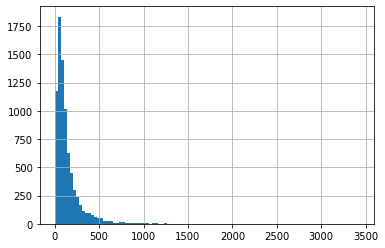

In [29]:
N_words=df.Text.apply(lambda x: len(x.split(" ")))
N_words.hist(bins=100);

In [30]:
print("mean:" + str(N_words.mean()))
print("std:" + str(N_words.std()))
print("min:" + str(N_words.min()))
print("max:" + str(N_words.max()))

mean:137.64775
std:152.50615950191354
min:1
max:3427


2.2 The next function will check the number of reviews with only one (1) word. 

In [31]:
df1=df.copy()
df1['N_words']=N_words
df1[df1.N_words<3]

,Text,Sentiment,N_words
245,\nPeriod\n,1,1


2.3 Next, the following code to check the values of positive and negative sentiments, amking sure the data is balanced.

In [32]:
Sentiment_count=df.Sentiment.value_counts()
Sentiment_count

1    4000
0    4000
Name: Sentiment, dtype: int64

2.4 Next, the creation of a Word Cloud to illustrate the most frequent words without preprocessing

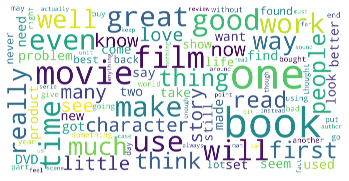

In [33]:
Words_cloud = " ".join(df.Text)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=400
).generate(Words_cloud)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<p> <a name=  "c3"><a></a> </p>


#3. Data Pre-Processing

3.1 The next stage is to select the  independent variable (df['Text']),  and target variable (df['Sentiment']); shuffle the data; and then split those in Train (80%) and Test(20%)

In [34]:
# Define tests variables

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.2, random_state=42)

3.1.1 Check the distribution of the target

In [35]:
y_train.value_counts()

0    3204
1    3196
Name: Sentiment, dtype: int64

In [36]:
y_test.value_counts()

1    804
0    796
Name: Sentiment, dtype: int64

3.2 Next, the definition of functions to process text reviews:

In [37]:
# Set functions

wordnet_lemmatizer = WordNetLemmatizer()
english_stopwords = stopwords.words('english')
word_set = set(brown.words())

# Define the cleaning function

def clear(sen, fix_misspelling = False):
    sen = sen.lower() # set all to downcase
    tokens = nltk.tokenize.word_tokenize(sen) # split string into tokens
    tokens = [t for t in tokens if len(t) >= 3] # remove words shorter than 3 chracters
    tokens = [t.translate(str.maketrans('', '', string.punctuation)) for t in tokens] # remove punctuation
    tokens = [t for t in tokens if not any(i.isdigit() for i in t)] # remove digits

    if fix_misspelling: # default false, for performance purposes
      for t in tokens:
        if t not in word_set:
          tokens = [w.replace(t, spell(t)) for w in tokens]

    tokens = [wordnet_lemmatizer.lemmatize(t, 'v') for t in tokens] # put words into base form
    tokens = [t for t in tokens if t not in english_stopwords] # remove stopwords    
    return tokens

3.3 Next, the encoding of tokens from reviews applying CountVectorizer model and the previous functions.

In [38]:
# encode into numerical
count_vect_model = CountVectorizer(tokenizer = clear)
count_vect_model.fit(X_train)
X_train_cnt = count_vect_model.transform(X_train)
X_test_cnt = count_vect_model.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


<p> <a name=  "c4"><a></a> </p>


#4. Data Modeling

4.1 Logistic Regression model was selected to predict the binary outcome from positive and negative reviews.
Then, this model was training with the X_train_cnt matrix and Y_train

In [39]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train_cnt, y_train)

LogisticRegression(max_iter=1000)

4.2 Next, the following metrics application for model evaluation

***This stage is crucial because it reflects the model accuracy at 82%, with precision for a positive sentiment of 81% and negative sentiment of 82%,  sensitivity of 83% and 80% positive and negative respectively ***

In [40]:
y_pred = model.predict(X_test_cnt)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       796
           1       0.82      0.82      0.82       804

    accuracy                           0.82      1600
   macro avg       0.82      0.82      0.82      1600
weighted avg       0.82      0.82      0.82      1600



4.3 Next, the next plot to visualize the performance of the tested data:

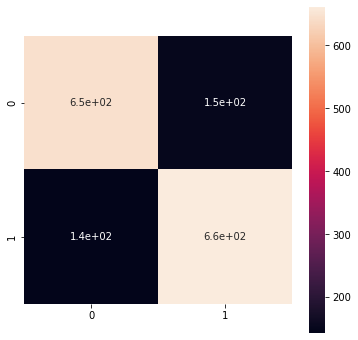

In [41]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, square=True);

4.3.1 This confussion matrix shows for the tested data:
*   670 reviews were true positive
*   640 reviews were true negative
*   160 reviews were false negative
*   140 reviews were false positive

4.4 On this stage, auxiliar class was applied to examine the dataset entries:

In [42]:
# Auxiliar class to compare future entries
class ValuedWord:
  def __init__(self, word, value):
    self.word = word
    self.value = value

valuedWords = []

# Word examination for highest prediction
threshold = 0.8
for i, j in zip(count_vect_model.get_feature_names_out(), model.coef_[0]):
    if j > threshold or j < -threshold:
        vw = ValuedWord(i, round(j, 3))
        valuedWords.append(vw)

4.4.1 Checking the evaluated values for each word

In [43]:
for vw in valuedWords:
  print(vw.word, vw.value)

amaze 1.158
appreciate 0.995
armband -1.058
awesome 0.877
awful -1.411
bad -0.899
barely -1.019
beautifully 1.143
best 1.194
blah -0.986
bore -1.597
braun 0.898
brilliant 0.853
bunch -0.864
cheap -0.909
clog -1.052
comfortable 0.838
complaint 0.815
cooker -0.994
cookware 0.832
cool 1.277
crack -0.82
crap -1.044
cycle -0.837
dangerous -1.061
delicious 0.962
die -0.849
disapointed -0.845
disappoint -1.595
disappointment -1.94
disney -0.828
dissapointed -1.048
distract -0.82
dracula 1.149
drawback 0.9
dull -0.871
ears -0.878
easier 1.05
easily 0.917
easy 1.321
enjoy 1.168
enjoyable 1.048
entertain 1.022
excellent 2.02
fail -1.148
fantastic 0.987
fast 1.055
faster 0.81
flow -0.803
fortunately -0.804
garbage -1.036
glad 1.429
graphic -0.808
grater -0.801
great 1.144
hardly -1.034
helen 0.984
highly 1.307
hop -0.928
horrible -0.993
impression -0.919
instal 0.805
instantly 0.838
intense 0.89
itrip 1.121
junk -1.257
lack -0.955
lame -1.079
larger 0.822
lenmar 0.895
local 0.829
love 1.091
mecha

<p> <a name=  "c5"><a></a> </p>

#5. Model Testing with New Entry Data

5.1 This model will compare the new sentence with the XML provided before, and a sum up of sentiments value

In [44]:
wordsConsidered = []
#Call the function to anvil 
@anvil.server.callable
def on_button_clicked(entrySen):
  wordsConsidered = []
  # Splitting sentence into cleaned tokens
  entered_words = clear(entrySen, True)
  
  senValue = 0 # The sentiment starts neutral
  
  # Compare each word from the entered sentence with the those from the XML  
  for word in entered_words:
    for vw in valuedWords:
      if word == vw.word:
        wordsConsidered.append(vw)
        senValue += vw.value

  str_result = ''
  # Sum up sentiments value
  if senValue != 0:
    if senValue > 0:
      str_result = 'positive'
    else:
      str_result = 'negative'
  else:
    str_result = 'neutral'
  
  result1 = ''
  for c in wordsConsidered:
    result1 += '\n ' + str(c.word) + ', ' + str(c.value)
 
  return 'This sentence is ' + str(str_result) + '!' +  '\nThe words taken into consideration are: ' + str(result1)

In [45]:
def on_words_considered_click():
  
  result = ''
  for c in wordsConsidered:
    result += '\n' + str(c.word) + ', ' + str(c.value)
  return result

<p> <a name=  "c6"><a></a> </p>


#6. Data Modeling with Neural Networks

6.1 The following code will convert the matrix of token counts into numpy arrays as Keras is not supporting the present format

In [46]:
X_train_cnt1=X_train_cnt.toarray()
X_test_cnt1=X_test_cnt.toarray()
X_train_cnt1.shape # Display de number of rows and columns

(6400, 30607)

In [47]:
#Keeps the notebook running and  the app calls the functions indefinitely.
#anvil.server.wait_forever()

#7. Internal Testing

The following code is just for internal tests, without using the Anvil app integration.

In [48]:
new_sen = input()
print(on_button_clicked(new_sen))
print(on_words_considered_click())

This product is AMAZING! I love it, because it's so good. But it is the worst of the series.
This sentence is positive!
The words taken into consideration are: 
 amaze, 1.158
 love, 1.091
 worst, -2.011

